In [97]:
import pandas as pd
df = pd.read_excel('/Volumes/transcend/大檔案/中華郵政/雷達指標.xlsx')

In [98]:
df.head(2)

,ACC01,局名,吸金能力,服務能力,資料完整度,招商能力,區域影響力,總分
0,100001,臺北東門,0.198107,0.000628,0.015093,0.058065,0.434783,0.706675
1,100005,臺北南海,0.301520,0.002879,0.009222,0.064516,0.565217,0.943355


In [99]:
df2 = df.copy()
df2 = df2[['吸金能力','服務能力','資料完整度','招商能力','區域影響力']]

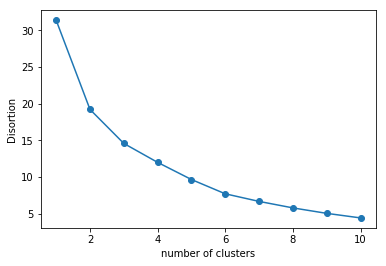

Distortion: 4.40


In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df2)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Disortion')
plt.show()
print('Distortion: %.2f' % km.inertia_) # 群內誤差平方和SSE

In [123]:
km =KMeans(n_clusters=5,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(df2)

In [124]:
df3 = pd.concat([df, pd.DataFrame(y_km, columns=['分群結果'])], axis=1)

In [125]:
df3.groupby('分群結果').size()

分群結果
0     39
1    119
2     18
3    134
4      8
dtype: int64

In [126]:
df3[df3['分群結果']==2]

,ACC01,局名,吸金能力,服務能力,資料完整度,招商能力,區域影響力,總分,分群結果
154,100174,石碇,0.018032,0.000046,0.197611,0.000000,0.652174,0.867862,2
157,100181,深坑草地尾,0.118642,0.000507,0.028313,0.043011,0.826087,1.016560,2
158,100182,平溪,0.014212,0.000038,0.277686,0.000000,1.000000,1.291936,2
159,200028,貢寮,0.006058,0.000030,0.379482,0.000000,0.652174,1.037743,2
160,200029,貢寮澳底,0.018916,0.000081,0.176667,0.000000,0.652174,0.847837,2
161,200030,萬里,0.048113,0.000156,0.075026,0.012903,1.000000,1.136199,2
162,200032,金山,0.077580,0.000710,0.040938,0.047312,1.000000,1.166540,2
163,200033,雙溪,0.018316,0.000202,0.154676,0.000000,1.000000,1.173195,2
164,200034,瑞芳,0.104109,0.000507,0.030390,0.043011,0.739130,0.917147,2
165,200035,瑞芳九份,0.012208,0.000046,0.351125,0.002151,0.565217,0.930747,2


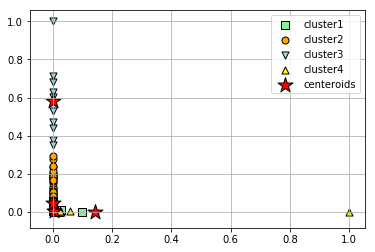

In [76]:
plt.scatter(df3[df3['分群結果']==0]['服務能力'],
            df3[df3['分群結果']==0]['資料完整度'],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster1')

plt.scatter(df3[df3['分群結果']==1]['服務能力'],
            df3[df3['分群結果']==1]['資料完整度'],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster2')

plt.scatter(df3[df3['分群結果']==2]['服務能力'],
            df3[df3['分群結果']==2]['資料完整度'],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster3')

plt.scatter(df3[df3['分群結果']==3]['服務能力'],
            df3[df3['分群結果']==3]['資料完整度'],
            s=50, c='yellow',
            marker='^', edgecolor='black',
            label='cluster4')

plt.scatter(km.cluster_centers_[:, 1], # 質心
            km.cluster_centers_[:, 2],
            s=250, marker='*', 
            c='red',edgecolor='black',
            label='centeroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()